In [1]:
import os

# define repo name and get root working directory
repo = 'gla'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]
root_path

'C:\\Users\\Chris.Williams\\Documents\\GitHub\\gla'

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plotFrame( df, coordinates ):

    platforms = [ 'GE01', 'WV01', 'WV02', 'WV03_VNIR', 'WV03_SWIR', 'WV04' ]    
    df = df[ df[ 'source' ].isin( platforms ) ]
    
    # bin aos datetimes into monthly bins
    hist=df.groupby([ pd.Grouper(key='aos', freq='1M'), pd.Grouper(key='source') ] )[ 'aos' ].count().unstack('source').fillna(0)
    ax = hist.plot( kind='bar', figsize=(16,8), title='Temporal Distribution of SecureWatch Datasets: {coordinates}'.format( coordinates=coordinates ), stacked=True )
    
    # plot histogram
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xticklabels( [ np.datetime_as_string(t, unit='M') for t in hist.index.values ], rotation=90)
    ax.set_xlabel( 'Acquisition DateTime' )
    ax.set_ylabel( 'Number of Datasets' )
    plt.show()


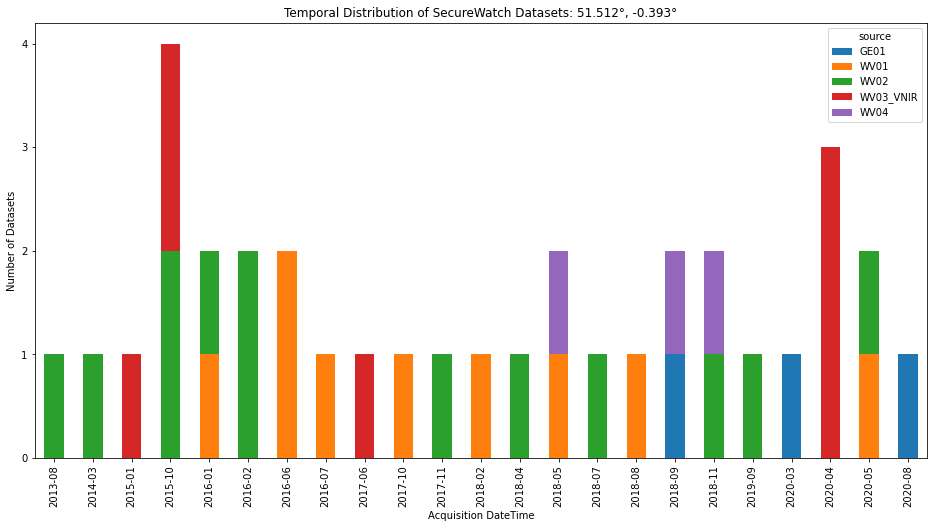

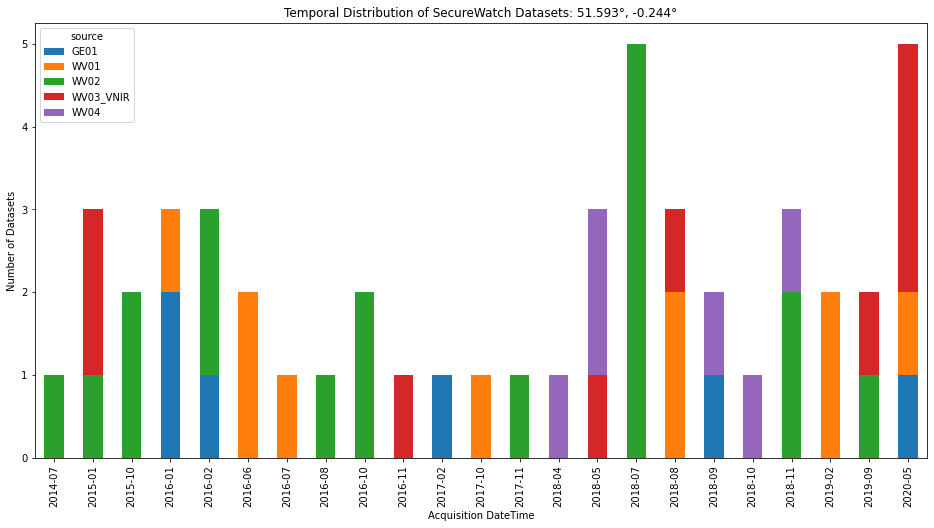

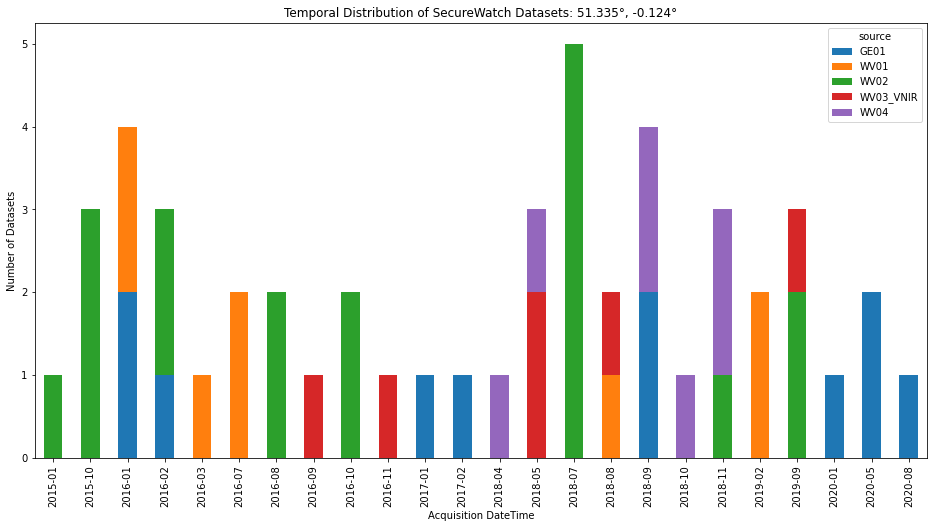

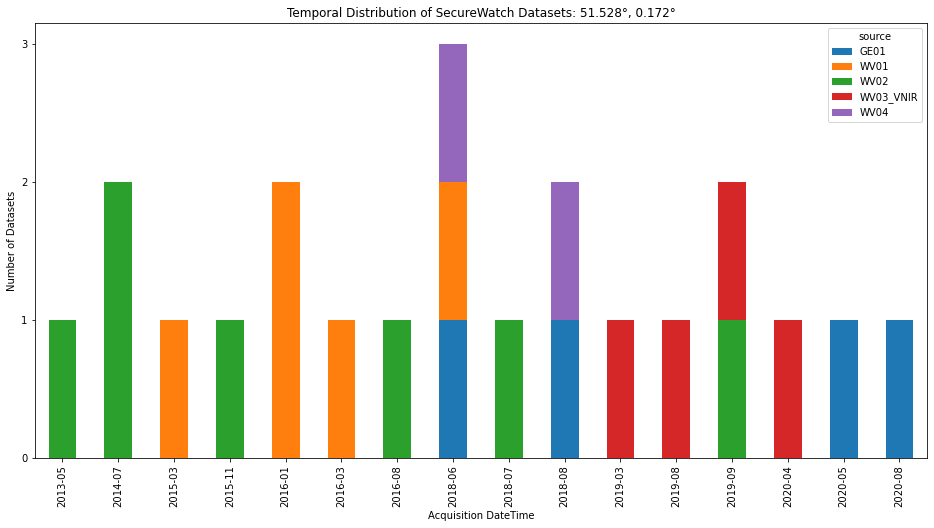

In [3]:
import glob
import pandas as pd
from datetime import datetime

permissions = [ 
    { 'name' : 'ldd_522161',
      'coordinates' : '51.512°, -0.393°' },
    { 'name' : 'ldd_355578',
      'coordinates' : '51.593°, -0.244°' },
    { 'name' : 'ldd_287705',
      'coordinates' : '51.335°, -0.124°' },
    { 'name' : 'ldd_139521',
      'coordinates' : '51.528°, 0.172°' },
]


# load info datasets
root_path = os.path.join( root_path, 'data/securewatch' )
for permission in permissions:

    path = os.path.join( root_path, permission[ 'name'] )
    df = pd.read_csv( os.path.join( path, 'info.csv' ), names=[ 'source', 'aos' ] )
        
    # read info into data frame
    df[ 'aos' ] = pd.to_datetime( df[ 'aos' ] ) 
    plotFrame( df, permission[ 'coordinates' ] )
